In [102]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [107]:
img_path = "C:/Users/Mark/Pictures/Saved Pictures/g.jpg"

## 读取图片


In [108]:
"""读取图片"""
img = cv2.imread(img_path)

In [109]:
type(img)

numpy.ndarray

In [112]:
img.shape

(1635, 2323, 3)

## 展示图片


In [1]:
## 展示图片
"""展示图片"""
# cv2.imshow("image",img)
# cv2.waitKey(0)
plt.imshow(img)
plt.show()

NameError: name 'plt' is not defined

## TGB to BGR,opencv需要转换一下，给pil用


```python
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
```

## 保存图片


In [115]:
cv2.imwrite("a.jpg", b)

True

## 修改图片尺寸 cv2.resize()

```python
cv2.resize(InputArray src, OutputArray dst, Size, fx, fy, interpolation)
```

|参数名|参数含义|
|---|---|
|InputArray src|输入图片|
|OutputArray dst|输出图片|
|size| 尺寸|
|fx,fy|沿x、y的缩放系数|
|interpolation|插值方式|

插值方式具体：

|名称|译|特点|
|--|--|--|
|INTER_NEAREST|最近邻插值|优点：计算量很小，运算速度较快。缺点：图像质量损失较大，会产生明显的马赛克和锯齿现象。|
|INTER_LINEAR|双线性插值<font color = "red">默认</font>|细节比最近邻插值更好，但是速度没有它快，复杂度更高，因此具有低通滤波器的性质, 从而导致缩放后图像的高频分量受到损失, 图像边缘在一定程度上变得较为模糊。产生图像质量受损与计算精度不高的问题。|
|INTER_AREA||使用像素区域关系进行重采样。|
|INTER_CUBIC||细节上比双线性插值法更好，是商业图像中的标准方法。双三次插值考虑的是周围16个像素的像素值，其权重因子的计算比较复杂。|
|INTER_LANCZOS4|8x8像素邻域的Lanczos插值||

In [2]:
#resize(InputArray src, OutputArray dst, Size, fx, fy, interpolation)
b = cv2.resize(img, (1161,817), interpolation = cv2.INTER_CUBIC)
plt.imshow(b)
plt.show()

NameError: name 'cv2' is not defined

## 滤波

均值滤波、中值滤波：
均值滤波：一个元素周围像素点加起来求均值，所的像素是这个元素

## 图像加法 cv2.add()
```python
(dst) = cv2.add(src1, src2, dst = None, mask = None, dtype = None)
```
参数说明： 

|参数名|内容|
|:-|:-|
|src1,src2|需要像假的两个图像或者标量|
|dst|输出结果保存的参数|
|mask|图像掩膜|

In [72]:
ad = cv2.add(img,66)

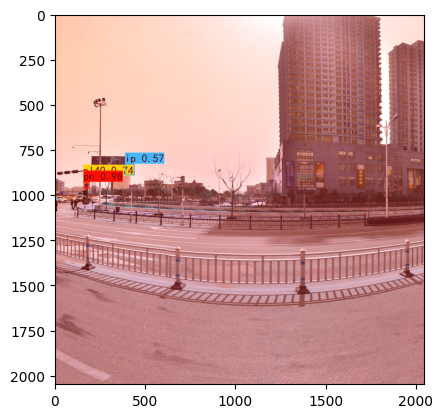

In [73]:
plt.imshow(ad)
plt.show()

## 图像绘制 
```python
"""写字"""
(dst) = cv2.putText(src1, string&text, point org, int fontFace, double fontScale, Scalar color, int thickness = 1, int lineType = 8)
"""画直线"""
cv2.line()
"""画圆"""
cv2.circle()
"""长方形"""
cv2.rectangle(picture, (x_min,y_min), (x_max, y_max),(0,0,255), -1)

```
参数说明：  

|参数名|内容|
|--|--|
|img|待写入字的图片|
|string&text|待写入的字|
|org|第一个字符左下角坐标,例如这个参数(50,60)|
|fontFace|字体类型|
|fontScale|字体大小|
|Scalar color|字体颜色，颜色用Scalar()表示|
|thickness|字体粗细|
|lineType|线型|

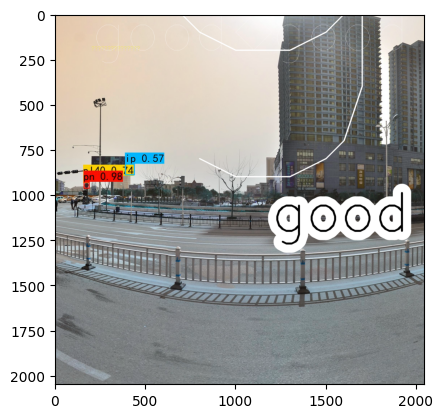

In [97]:
# 实际操作发现原图也修改了
cv2.putText(img, "good", (1200,1200),cv2.FONT_HERSHEY_SIMPLEX, 10, (255,255,255),100,100)
res = cv2.putText(img, "good", (1200,1200),cv2.FONT_HERSHEY_SIMPLEX, 10, (0,0,0), 10)
plt.imshow(res)
plt.show()

In [100]:
img = cv2.imread(img_path)

## 几何变换

|函数|功能|说明|参数|
|:-|:-|--|:-|
|cv2.warpAffine(img, M, dsize, dst = None, flags=None, borderMode=None,borderValue=None)|图像平移<br>（不知道为什么叫仿射变换）|进行一次线性变换接上平移|M：运算矩阵，两行三列<br>dsize:运算后矩阵大小(输出尺寸)<br>dst:输出图像<br>flags：插值方法（同resize中interpolation)<br>borderMode:像素外推方法<br>borderValue:恒定边框使用borderValue值，默认0|
|cv2.getRotationMatrix2D(center, angle, scale)|图像旋转|||
|cv2.pyrUp(img)|图像上采样|||
|cv2.pyrDown(img)|图像下采样|||
|cv2.morphologyEx(img, op, kernel)|形态学变换<br>开运算和闭运算<br>礼帽和黑帽|[开运算和闭运算](https://blog.csdn.net/qq_32867925/article/details/104750172)<br>[礼帽和黑帽](https://blog.csdn.net/great_yzl/article/details/119594716)|op=cv2.MORPH_OPEN开运算<br>op=cv2.MORPH_CLOSE闭运算<br>kernel：表示方框的大小<br>例：kernel = np.one((5,5), np.uint8)|

说明：
图像学基本概念：腐蚀、膨胀
开运算闭运算


#### 开运算
功能：消除小物体、平滑较大物体
操作：先腐蚀后膨胀

#### 闭运算
功能：填充物体细小空间，连接临近物体，平滑边界同时不改变面积
操作：先膨胀后腐蚀

In [58]:
ad

array([[[255, 199, 173],
        [255, 199, 173],
        [255, 199, 173],
        ...,
        [255, 222, 212],
        [255, 222, 212],
        [255, 222, 212]],

       [[255, 199, 173],
        [255, 199, 173],
        [255, 199, 173],
        ...,
        [255, 222, 212],
        [255, 222, 212],
        [255, 222, 212]],

       [[255, 199, 173],
        [255, 199, 173],
        [255, 199, 173],
        ...,
        [255, 222, 212],
        [255, 222, 212],
        [255, 222, 212]],

       ...,

       [[160, 107, 107],
        [166, 113, 113],
        [174, 121, 121],
        ...,
        [173, 122, 123],
        [176, 125, 126],
        [179, 128, 129]],

       [[169, 116, 116],
        [172, 119, 119],
        [177, 124, 124],
        ...,
        [176, 125, 126],
        [177, 126, 127],
        [178, 127, 128]],

       [[174, 121, 121],
        [175, 122, 122],
        [177, 124, 124],
        ...,
        [175, 124, 125],
        [174, 123, 124],
        [174, 123, 124]]

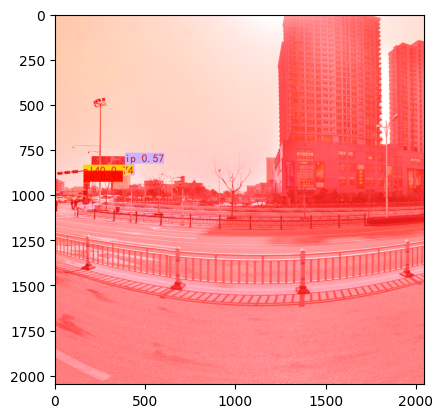

In [63]:
plt.imshow(ad)
plt.show()